In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..'); sys.path.append('../gp/')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [21]:
input_image = []
input_prob = []
input_gold = []
input_rhoana = []

for z in range(2):
    image, prob, gold, rhoana = gp.Util.read_cremi_section(os.path.expanduser('~/data/CREMIGP/TEST/'), z)
    input_image.append(image)
    input_prob.append(255.-prob)
    input_gold.append(gold)
    input_rhoana.append(rhoana)    

In [13]:
NETS = []
NETS.append('../nets/IPMLB_FULL.p') # image + prob + binary + large border

network_path = NETS[-1]

with open(network_path, 'rb') as f:
    net = pickle.load(f)

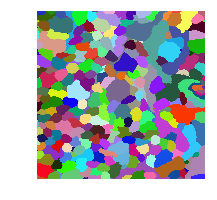

In [3]:
gp.Util.view(gold)

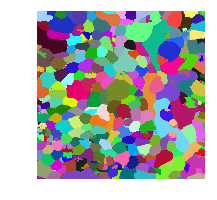

In [8]:
gp.Util.view(rhoana)

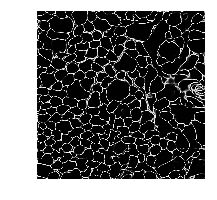

In [16]:
gp.Util.view(255.-prob, color=False)

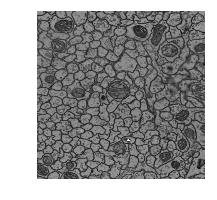

In [10]:
gp.Util.view(image, color=False)

In [23]:
gp.Legacy.VI(input_rhoana, input_gold)

(1.1205775466597609,
 1.1205775466597609,
 [1.0904856747798846, 1.1506694185396373])

In [12]:
gp.metrics.adapted_rand(rhoana, gold)

0.25980237467181599

In [22]:
net.uuid = 'IPMLB'
bigM_cremiA = gp.Legacy.create_bigM_without_mask(net, input_image, input_prob, input_rhoana, verbose=True)

5880 generated in 128.607522964 seconds.
Grouped into 1453 patches in 0.0261490345001 seconds.
5016 generated in 120.302376986 seconds.
Grouped into 1224 patches in 0.0232520103455 seconds.


In [25]:
bigM_cA_after_95, out_cA_volume_after_auto_95, cA_auto_fixes_95, cA_auto_vi_s_95, visperstep = gp.Legacy.splits_global_from_M_automatic(net, 
                                                                                                                            bigM_cremiA, 
                                                                                                                            input_image, 
                                                                                                                            input_prob, 
                                                                                                                            input_rhoana,
                                                                                                                            input_gold, 
                                                                                                                            sureness_threshold=.95)


30 minutes done bigM_max= 0.999846339226


In [26]:
gp.Legacy.VI(out_cA_volume_after_auto_95, input_gold)

(1.1979961293734362,
 1.1979961293734362,
 [1.1374454843879338, 1.2585467743589387])

In [27]:
visperstep

[(1.1205187243522197,
  1.1205187243522197,
  [1.0903680301647931, 1.1506694185396462]),
 (1.1205750199211311,
  1.1205750199211311,
  [1.090480621302616, 1.1506694185396462]),
 (1.1205373537420451,
  1.1205373537420451,
  [1.090405288944444, 1.1506694185396462]),
 (1.1204855308356558,
  1.1204855308356558,
  [1.090405288944444, 1.1505657727268677]),
 (1.1204578291693812,
  1.1204578291693812,
  [1.090405288944444, 1.1505103693943184]),
 (1.1204093220969673,
  1.1204093220969673,
  [1.0903082747996162, 1.1505103693943184]),
 (1.1204352670924926,
  1.1204352670924926,
  [1.0903601647906669, 1.1505103693943184]),
 (1.120432408075092,
  1.120432408075092,
  [1.0903601647906669, 1.1505046513595172]),
 (1.1204205447144391,
  1.1204205447144391,
  [1.090336438069361, 1.1505046513595172]),
 (1.1203517795432445,
  1.1203517795432445,
  [1.0901989077269718, 1.1505046513595172]),
 (1.1203197728565311,
  1.1203197728565311,
  [1.090134894353545, 1.1505046513595172]),
 (1.1202874124069959,
  1.120

In [56]:
gp.metrics.adapted_rand(out_cA_volume_after_auto_95, input_gold)

0.51512425659267813

In [57]:
cA_auto_fixes_95

[(0, 0.99999964237213135),
 (1, 0.99993455410003662),
 (0, 0.99991738796234131),
 (0, 0.99988996982574463),
 (0, 0.99985110759735107),
 (0, 0.99977564811706543),
 (0, 0.9997628927230835),
 (1, 0.99975866079330444),
 (0, 0.99974793195724487),
 (0, 0.99972277879714966),
 (0, 0.99971282482147217),
 (0, 0.99967020750045776),
 (1, 0.99959456920623779),
 (1, 0.999583899974823),
 (0, 0.99957650899887085),
 (1, 0.99951696395874023),
 (1, 0.99937832355499268),
 (0, 0.99928903579711914),
 (1, 0.99907684326171875),
 (0, 0.99902892112731934),
 (0, 0.99892705678939819),
 (0, 0.99888914823532104),
 (1, 0.9998706579208374),
 (1, 0.99888545274734497),
 (1, 0.99886083602905273),
 (0, 0.99883228540420532),
 (0, 0.99930858612060547),
 (0, 0.99880576133728027),
 (0, 0.99867504835128784),
 (1, 0.99838781356811523),
 (0, 0.99836021661758423),
 (1, 0.998313307762146),
 (0, 0.99977326393127441),
 (1, 0.99948069096907322),
 (0, 0.99829679727554321),
 (0, 0.99823164939880371),
 (0, 0.99810117483139038),
 (0, 0.